### 3.1: Verify Qiskit version

In [1]:
import qiskit
qiskit.version.get_version_info()

'1.0.2'

### 3.2: The first qubit

In [5]:
from qiskit import QuantumCircuit

# Create a quantum circuit with one qubit
qc = QuantumCircuit(1)

# Define initial_state as |1>
initial_state = [0,1]

# Apply initialization operation to the qubit at position 0
qc.initialize(initial_state, 0)

### 3.3: Prepare the simulation backend

In [3]:
from qiskit import transpile
from qiskit_aer import Aer

# Tell Qiskit how to simulate our circuit
backend = Aer.get_backend('statevector_simulator')

# Do the simulation, returning the result
new_circute = transpile(qc, backend)
job = backend.run(new_circute)

result = job.result()

### 3.4: The measured qubit

In [ ]:
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# get the probability distribution
counts = result.get_counts()

# Show the histogram
plot_histogram(counts)

### 3.5: First attempt to superpose two states

In [6]:
# Define state |psi>
initial_state = [1, 1]

# Redefine the quantum circuit
qc = QuantumCircuit(1)

# Initialise the 0th qubit in the state `initial_state`
qc.initialize(initial_state, 0)

# execute the qc
new_circute = transpile(qc, backend)
job = backend.run(new_circute)
results = job.result().get_counts()

# plot the results
plot_histogram(results) # and error will be rised

QiskitError: 'Sum of amplitudes-squared is not 1, but 1.4142135623730951.'

### 3.6: Weighted initial state

In [ ]:
from math import sqrt

# Define state |psi>
initial_state = [1/sqrt(2), 1/sqrt(2)]

# Redefine the quantum circuit
qc = QuantumCircuit(1)

# Initialise the 0th qubit in the state `initial_state`
qc.initialize(initial_state, 0)

# execute the qc# execute the qc
new_circute = transpile(qc, backend)
job = backend.run(new_circute)
results = job.result().get_counts()

# plot the results
plot_histogram(results)

### 3.7: The qubit with a probability of 0.25 to result in 0

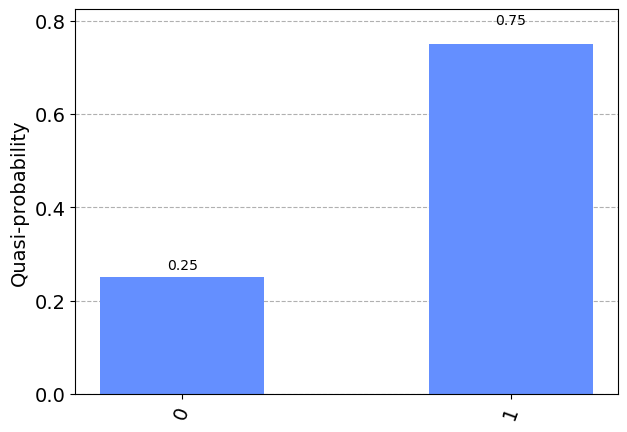

In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
from math import sqrt

qc = QuantumCircuit(1)
initial_state = [1/2, sqrt(3)/2] # Here, we insert the state

qc.initialize(initial_state, 0)

backend = Aer.get_backend('statevector_simulator')

new_circute = transpile(qc, backend)

job = backend.run(new_circute)

result = job.result()

counts = result.get_counts()

plot_histogram(counts)

### 3.8: Using theta to specify the quantum state vector

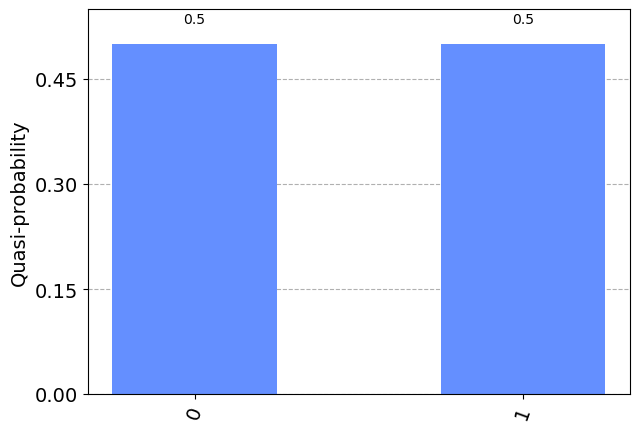

In [3]:
from math import pi, cos, sin
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

def get_state (theta):
    """returns a valid state vector"""
    return [cos(theta/2), sin(theta/2)]

# play with the values for theta to get a feeling
theta = -pi/2 # affects the probabilities


# create, initialize, and execute the quantum circuit
qc = QuantumCircuit(1)
qc.initialize(get_state(theta), 0)

backend = Aer.get_backend('statevector_simulator')
new_circute = transpile(qc, backend)
job = backend.run(new_circute)
result = job.result()
counts = result.get_counts()

# Show the histogram
plot_histogram(counts)